# Es 11.1

Proverò a rifare il fit lineare con i seguenti metodi:
- Aumentando le epoche
- Aumentanfo il set di train e valid

E con una sigma = 0.6

### Più epoche

In [28]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [29]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.6 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

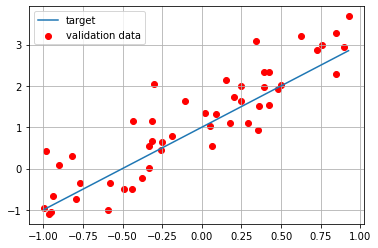

In [30]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [32]:
# get a summary of our composed model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [33]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=320,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/320
16/16 [==============================] - 0s 7ms/step - loss: 2.7740 - mse: 2.7740 - val_loss: 2.4705 - val_mse: 2.4705
Epoch 2/320
16/16 [==============================] - 0s 2ms/step - loss: 2.1254 - mse: 2.1254 - val_loss: 1.9291 - val_mse: 1.9291
Epoch 3/320
16/16 [==============================] - 0s 3ms/step - loss: 1.6889 - mse: 1.6889 - val_loss: 1.5515 - val_mse: 1.5515
Epoch 4/320
16/16 [==============================] - 0s 2ms/step - loss: 1.3799 - mse: 1.3799 - val_loss: 1.2778 - val_mse: 1.2778
Epoch 5/320
16/16 [==============================] - 0s 3ms/step - loss: 1.1529 - mse: 1.1529 - val_loss: 1.0769 - val_mse: 1.0769
Epoch 6/320
16/16 [==============================] - 0s 2ms/step - loss: 0.9831 - mse: 0.9831 - val_loss: 0.9239 - val_mse: 0.9239
Epoch 7/320
16/16 [==============================] - 0s 3ms/step - loss: 0.8510 - mse: 0.8510 - val_loss: 0.8075 - val_mse: 0.8075
Epoch 8/320
16/16 [==============================] - 0s 4ms/step - loss: 0.7495 - m

16/16 [==============================] - 0s 2ms/step - loss: 0.3523 - mse: 0.3523 - val_loss: 0.4009 - val_mse: 0.4009
Epoch 64/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3522 - mse: 0.3522 - val_loss: 0.4012 - val_mse: 0.4012
Epoch 65/320
16/16 [==============================] - 0s 4ms/step - loss: 0.3523 - mse: 0.3523 - val_loss: 0.4017 - val_mse: 0.4017
Epoch 66/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3522 - mse: 0.3522 - val_loss: 0.4013 - val_mse: 0.4013
Epoch 67/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3523 - mse: 0.3523 - val_loss: 0.4018 - val_mse: 0.4018
Epoch 68/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3524 - mse: 0.3524 - val_loss: 0.4030 - val_mse: 0.4030
Epoch 69/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3523 - mse: 0.3523 - val_loss: 0.4028 - val_mse: 0.4028
Epoch 70/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3522 - mse: 0

Epoch 125/320
16/16 [==============================] - 0s 3ms/step - loss: 0.3524 - mse: 0.3524 - val_loss: 0.4017 - val_mse: 0.4017
Epoch 126/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3522 - mse: 0.3522 - val_loss: 0.4018 - val_mse: 0.4018
Epoch 127/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3523 - mse: 0.3523 - val_loss: 0.4026 - val_mse: 0.4026
Epoch 128/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3522 - mse: 0.3522 - val_loss: 0.4020 - val_mse: 0.4020
Epoch 129/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3522 - mse: 0.3522 - val_loss: 0.4019 - val_mse: 0.4019
Epoch 130/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3522 - mse: 0.3522 - val_loss: 0.4024 - val_mse: 0.4024
Epoch 131/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3524 - mse: 0.3524 - val_loss: 0.4028 - val_mse: 0.4028
Epoch 132/320
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 4ms/step - loss: 0.3522 - mse: 0.3522 - val_loss: 0.4032 - val_mse: 0.4032
Epoch 187/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3523 - mse: 0.3523 - val_loss: 0.4034 - val_mse: 0.4034
Epoch 188/320
16/16 [==============================] - 0s 3ms/step - loss: 0.3522 - mse: 0.3522 - val_loss: 0.4031 - val_mse: 0.4031
Epoch 189/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3522 - mse: 0.3522 - val_loss: 0.4031 - val_mse: 0.4031
Epoch 190/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3523 - mse: 0.3523 - val_loss: 0.4027 - val_mse: 0.4027
Epoch 191/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3523 - mse: 0.3523 - val_loss: 0.4038 - val_mse: 0.4038
Epoch 192/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3522 - mse: 0.3522 - val_loss: 0.4027 - val_mse: 0.4027
Epoch 193/320
16/16 [==============================] - 0s 3ms/step - loss: 0.3522 -

Epoch 248/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3523 - mse: 0.3523 - val_loss: 0.4017 - val_mse: 0.4017
Epoch 249/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3524 - mse: 0.3524 - val_loss: 0.4005 - val_mse: 0.4005
Epoch 250/320
16/16 [==============================] - 0s 3ms/step - loss: 0.3524 - mse: 0.3524 - val_loss: 0.4000 - val_mse: 0.4000
Epoch 251/320
16/16 [==============================] - 0s 3ms/step - loss: 0.3523 - mse: 0.3523 - val_loss: 0.3985 - val_mse: 0.3985
Epoch 252/320
16/16 [==============================] - 0s 3ms/step - loss: 0.3524 - mse: 0.3524 - val_loss: 0.3990 - val_mse: 0.3990
Epoch 253/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3523 - mse: 0.3523 - val_loss: 0.4004 - val_mse: 0.4004
Epoch 254/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3524 - mse: 0.3524 - val_loss: 0.4009 - val_mse: 0.4009
Epoch 255/320
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.3522 - mse: 0.3522 - val_loss: 0.4010 - val_mse: 0.4010
Epoch 310/320
16/16 [==============================] - 0s 4ms/step - loss: 0.3522 - mse: 0.3522 - val_loss: 0.4009 - val_mse: 0.4009
Epoch 311/320
16/16 [==============================] - 0s 3ms/step - loss: 0.3523 - mse: 0.3523 - val_loss: 0.3999 - val_mse: 0.3999
Epoch 312/320
16/16 [==============================] - 0s 3ms/step - loss: 0.3523 - mse: 0.3523 - val_loss: 0.3995 - val_mse: 0.3995
Epoch 313/320
16/16 [==============================] - 0s 3ms/step - loss: 0.3523 - mse: 0.3523 - val_loss: 0.3996 - val_mse: 0.3996
Epoch 314/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3522 - mse: 0.3522 - val_loss: 0.4010 - val_mse: 0.4010
Epoch 315/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3524 - mse: 0.3524 - val_loss: 0.4015 - val_mse: 0.4015
Epoch 316/320
16/16 [==============================] - 0s 2ms/step - loss: 0.3523 -

In [34]:
# return weights and biases
model.get_weights()

[array([[2.064649]], dtype=float32), array([0.9365079], dtype=float32)]

In [35]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.4011 - mse: 0.4011

Test loss: 0.40111368894577026
Test accuracy: 0.40111368894577026


In [36]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - mse: 0.0058

Test loss: 0.005794242024421692
Test accuracy: 0.005794242024421692


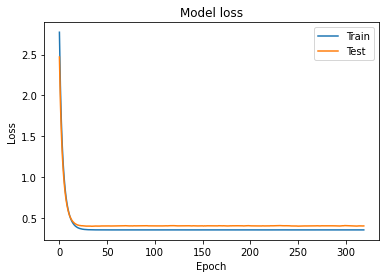

In [37]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

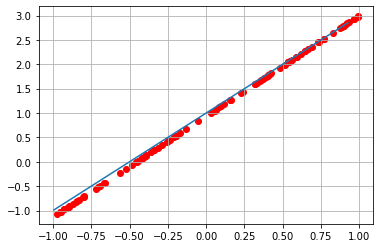

In [38]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Più train/valid

In [39]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [40]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 500)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.6 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

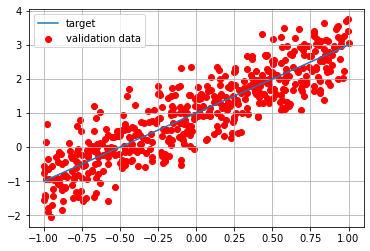

In [41]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [43]:
# get a summary of our composed model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [44]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
157/157 [==============================] - 0s 1ms/step - loss: 1.7998 - mse: 1.7998 - val_loss: 0.6893 - val_mse: 0.6893
Epoch 2/30
157/157 [==============================] - 0s 858us/step - loss: 0.5104 - mse: 0.5104 - val_loss: 0.3795 - val_mse: 0.3795
Epoch 3/30
157/157 [==============================] - 0s 857us/step - loss: 0.3723 - mse: 0.3723 - val_loss: 0.3464 - val_mse: 0.3464
Epoch 4/30
157/157 [==============================] - 0s 790us/step - loss: 0.3558 - mse: 0.3558 - val_loss: 0.3428 - val_mse: 0.3428
Epoch 5/30
157/157 [==============================] - 0s 900us/step - loss: 0.3536 - mse: 0.3536 - val_loss: 0.3427 - val_mse: 0.3427
Epoch 6/30
157/157 [==============================] - 0s 807us/step - loss: 0.3534 - mse: 0.3534 - val_loss: 0.3428 - val_mse: 0.3428
Epoch 7/30
157/157 [==============================] - 0s 827us/step - loss: 0.3533 - mse: 0.3533 - val_loss: 0.3429 - val_mse: 0.3429
Epoch 8/30
157/157 [==============================] - 0s 844us/s

In [45]:
# return weights and biases
model.get_weights()

[array([[1.989787]], dtype=float32), array([1.0016695], dtype=float32)]

In [46]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 3ms/step - loss: 0.3430 - mse: 0.3430

Test loss: 0.34297287464141846
Test accuracy: 0.34297287464141846


In [47]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 2ms/step - loss: 3.7196e-05 - mse: 3.7196e-05

Test loss: 3.7195757613517344e-05
Test accuracy: 3.7195757613517344e-05


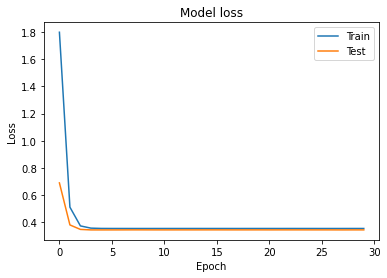

In [48]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

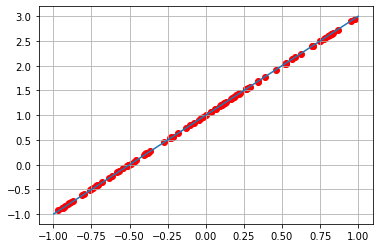

In [49]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Ho decuplicato prima le epoche e poi set di train/valid e ho ottenuto un risultato nettamente migliore in quest'ultimo caso.
Per questo problema almeno si può dire  che questa seconda variabile è stata più incisiva.